In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [169]:
df=pd.read_csv('exercise.csv').drop('User_ID',axis=1)
y_train=pd.read_csv('calories.csv').drop('User_ID',axis=1)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 820.4+ KB


In [171]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [172]:
df["Gender"].value_counts()
df.replace({"Gender":{"female":0,"male":1}},inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_1712\569694118.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{"female":0,"male":1}},inplace=True)


<Axes: >

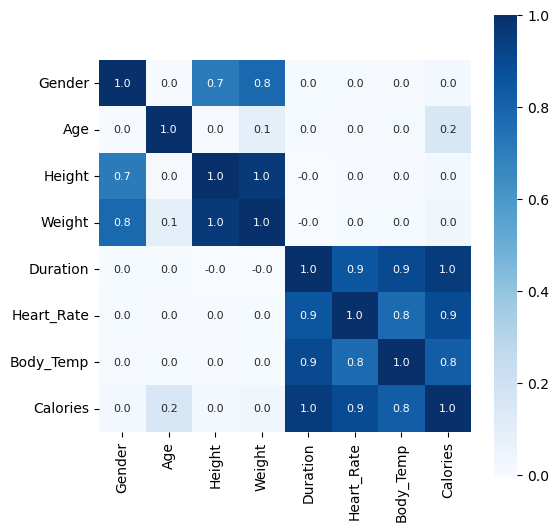

In [173]:
correlation=pd.concat([df, y_train], axis=1).corr()
# print(pd.concat([df, y_train], axis=1))
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [174]:
y_train=y_train.values
x_train=df.values

In [175]:
x_norm=StandardScaler().fit_transform(x_train)
x_norm,x_test,y_train,y_test=train_test_split(x_norm,y_train,test_size=0.2,random_state=41)

In [176]:
# max_dgree=9
# err_cv=np.zeros(max_dgree)
# err_train=np.zeros(max_dgree)
# for i in range(max_dgree):
#     pol=PolynomialFeatures(i+1,include_bias=False)
#     # normlize data training
#     x_pol=pol.fit_transform(x_norm)
#     # normlize data cv
#     x_p=pol.fit_transform(x_test)
#     # train model 
#     model=LinearRegression()
#     model.fit(x_pol,y_train)
#     # prediction 
#     y_hat_cv=model.predict(x_p)
#     y_hat=model.predict(x_pol)
#     err_cv[i]=mean_squared_error(y_test,y_hat_cv)/2
#     err_train[i]=mean_squared_error(y_train,y_hat)/2
# optimal_degree=np.argmin(err_cv)+1
# print(optimal_degree)
# print(err_train)
# print(err_cv)

In [177]:
# pol=PolynomialFeatures(3,include_bias=False)
# x_train=pol.fit_transform(x_norm)
# x_test=pol.fit_transform(x_test)
# model=LinearRegression()
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# error_score =r2_score(y_test, y_pred)
# mse=mean_squared_error(y_test,y_pred)
# print("R squared Error : ", error_score*100)
# print("MSE",mse)
# for i in range(20):
#     print(y_pred[i],"=>",y_test[i])

In [178]:
# R squared Error :  99.99786346687574
# MSE 0.08563619125931467 level 3

In [179]:
#XGB
model_xgb=XGBRegressor()
model_xgb.fit(x_norm,y_train)
y_pred=model_xgb.predict(x_test)
error_score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("XGB")
print("R squared Error : ", error_score*100)
print("MSE",mse)
for i in range(20):
    print(y_pred[i],"=>",y_test[i])


#random forest
randomF=RandomForestRegressor()
randomF.fit(x_norm,y_train)
y_pred=randomF.predict(x_test)
error_score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("random forest")
print("R squared Error : ", error_score*100)
print("MSE",mse)
for i in range(20):
    print(y_pred[i],"=>",y_test[i])

XGB
R squared Error :  99.87017301298823
MSE 5.2037052756709885
118.87947 => [121.]
50.17367 => [50.]
82.729935 => [85.]
9.623892 => [10.]
3.9372506 => [4.]
34.53924 => [33.]
137.47552 => [139.]
115.62505 => [116.]
56.498814 => [58.]
154.02676 => [152.]
141.44035 => [142.]
142.27103 => [143.]
52.865192 => [52.]
149.66846 => [151.]
138.93227 => [136.]
22.20844 => [22.]
166.19829 => [163.]
167.59048 => [169.]
5.379682 => [6.]
110.64127 => [103.]


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


random forest
R squared Error :  99.7426768680185
MSE 10.313986100000001
120.23 => [121.]
50.1 => [50.]
81.53 => [85.]
10.37 => [10.]
4.15 => [4.]
32.43 => [33.]
139.09 => [139.]
123.98 => [116.]
57.89 => [58.]
153.05 => [152.]
141.64 => [142.]
145.69 => [143.]
52.01 => [52.]
153.78 => [151.]
137.65 => [136.]
22.7 => [22.]
171.18 => [163.]
169.16 => [169.]
5.74 => [6.]
98.86 => [103.]
